In [38]:
#Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [39]:
### Loading the training and testing dataset 
training_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))

In [40]:
#### Dividin into training and validation set
train_set, validation_set = torch.utils.data.random_split(training_set, [50000, 10000])

In [41]:
print(len(train_set))

50000


In [42]:
print(len(validation_set))

10000


In [43]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
vald_loader = torch.utils.data.DataLoader(validation_set, batch_size=100)

In [44]:
### Creating the model and it isq named as FashionMNIST
### It contains the layers and forward function implementation
class FashionMNIST(nn.Module):

  def __init__(self):
    super(FashionMNIST, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
    )

    self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
    self.fc2 = nn.Linear(in_features=600, out_features=120)
    self.fc3 = nn.Linear(in_features=120, out_features=10)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out = self.fc2(out)
    out = self.fc3(out)
        
    return out


In [45]:
### Model calling
### Adam Optimizier is be2ing used

model = FashionMNIST()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionMNIST(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [46]:
#### Starting the training of the model
#### batch size and epochs are defined 
#### loss is appended in average_loss list

batch_size = 100
x_dim  = 784
epochs = 5

print("Start training ......................")
model.train()
average_loss = []

for epoch in range(epochs):
    #initially overall loss is zero
    overall_loss = 0
    for batch_idx, (x, labels) in enumerate(train_loader):
        x = x.view(batch_size, 1,28,28)
        optimizer.zero_grad()
        #prediction on the model
        label_pred = model(Variable(x))
        loss = nn.CrossEntropyLoss()(label_pred, Variable(labels))
        overall_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    #average loss is calculated    
    e = (overall_loss / (batch_idx*batch_size))
    print("\tEpoch", epoch + 1, "completed!", "\tAverage Loss here: ", e)
    average_loss.append(e)
    
print("Finish!!")

Start training ......................
	Epoch 1 completed! 	Average Loss here:  0.004475009577248044
	Epoch 2 completed! 	Average Loss here:  0.0030470254615636056
	Epoch 3 completed! 	Average Loss here:  0.0026228474879372334
	Epoch 4 completed! 	Average Loss here:  0.002371041752950462
	Epoch 5 completed! 	Average Loss here:  0.0021753025110176427
Finish!!


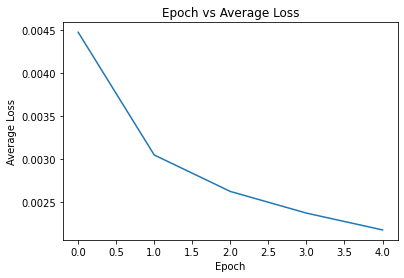

In [47]:
#### Question 1) part a) Graph of training loss vs number of epochs while training
plt.title("Epoch vs Average Loss")
plt.plot(list(range(epochs)), average_loss)
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()

In [48]:
import glob
from google.colab import drive
drive.mount('/google_drive', force_remount = True)

torch.save(model.state_dict(),"/google_drive/MyDrive/cnnmodel")

Mounted at /google_drive


In [49]:
#### Tuning hyperparameter on validation set to check for better accuraccy

c1 = 16
c2 = 32
for i in range(0, 3):
  class FashionMNIST(nn.Module):
    def __init__(self):
      super(FashionMNIST, self).__init__()

      self.layer1 = nn.Sequential(
          nn.Conv2d(in_channels=1, out_channels=c1, kernel_size=3, padding=1),
              nn.BatchNorm2d(c1),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2)
      )

      self.layer2 = nn.Sequential(
          nn.Conv2d(in_channels=c1, out_channels=c2, kernel_size=3),
              nn.BatchNorm2d(c2),
              nn.ReLU(),
              nn.MaxPool2d(2)
      )

      self.fc1 = nn.Linear(in_features=c2*6*6, out_features=600)
      self.fc2 = nn.Linear(in_features=600, out_features=120)
      self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = out.view(out.size(0), -1)
      out = self.fc1(out)
      out = self.fc2(out)
      out = self.fc3(out)
          
      return out

  model = FashionMNIST()
  learning_rate = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  batch_size = 100
  epochs = 5

  print("Start training ...")
  model.train()
  average_loss = []

  for epoch in range(epochs):
      overall_loss = 0
      for batch_idx, (x, labels) in enumerate(train_loader):
          x = x.view(batch_size, 1,28,28)
          optimizer.zero_grad()
          label_pred = model(Variable(x))
          loss = nn.CrossEntropyLoss()(label_pred, Variable(labels))
          overall_loss += loss.item()
          loss.backward()
          optimizer.step()
          
      e = (overall_loss / (batch_idx*batch_size))
      print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", e)
      average_loss.append(e)
      
  print("Finish!!")

  label_list = []
  accuracy_list = []
  predictions_list = []
  correct = 0
  total = []
  for batch_idx, (x, labels) in enumerate(vald_loader):

      label_list.append(labels)
      x = x.view(batch_size, 1,28,28)
      outputs = model(x)
      predictions = torch.max(outputs, 1)[1]
      predictions_list.append(predictions)
      correct += (predictions == labels).sum()
              
      
              
  accuracy = correct * 100 / len(validation_set)
  accuracy_list.append(accuracy)
  print("Accuraccy is:", accuracy)
  c1 = c1*2
  c2 = c2*2

Start training ...
	Epoch 1 complete! 	Average Loss:  0.004535982426636683
	Epoch 2 complete! 	Average Loss:  0.0031862241468711464
	Epoch 3 complete! 	Average Loss:  0.002810139070472163
	Epoch 4 complete! 	Average Loss:  0.0025808250147080374
	Epoch 5 complete! 	Average Loss:  0.0024027369156449973
Finish!!
Accuraccy is: tensor(89.4800)
Start training ...
	Epoch 1 complete! 	Average Loss:  0.0045393730228195685
	Epoch 2 complete! 	Average Loss:  0.0030164442084475843
	Epoch 3 complete! 	Average Loss:  0.0025896169494591162
	Epoch 4 complete! 	Average Loss:  0.0023512869876228973
	Epoch 5 complete! 	Average Loss:  0.002150353411649296
Finish!!
Accuraccy is: tensor(90.1900)
Start training ...
	Epoch 1 complete! 	Average Loss:  0.004817849378846212
	Epoch 2 complete! 	Average Loss:  0.003066761092038336
	Epoch 3 complete! 	Average Loss:  0.002613719563057762
	Epoch 4 complete! 	Average Loss:  0.0023444024576452786
	Epoch 5 complete! 	Average Loss:  0.0021442037410212902
Finish!!
Accurac